# Assignment-03-Q1 (Hypothesis Testing)

In [31]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [32]:
data = pd.read_csv('C:/Users/Payod/Downloads/Cutlets.csv')
data.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [33]:
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [34]:
data.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [35]:
data[data.duplicated()].shape

(0, 2)

# DATA TYPE

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
Unit A    35 non-null float64
Unit B    35 non-null float64
dtypes: float64(2)
memory usage: 640.0 bytes


# DATA PLOTTING

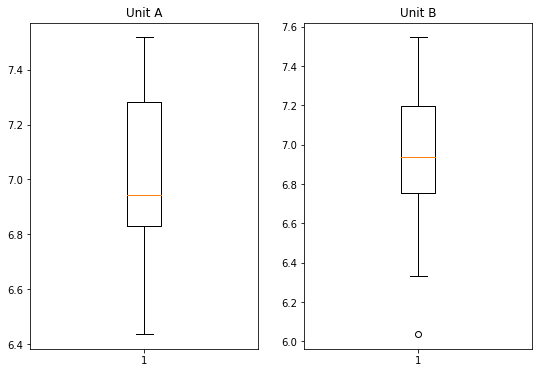

In [37]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(data['Unit B'])
plt.title('Unit B')
plt.show()


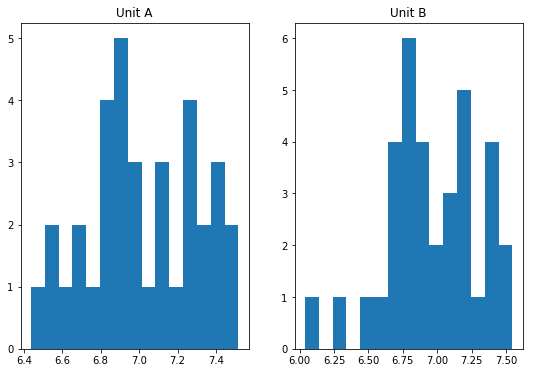

In [38]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(data['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(data['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

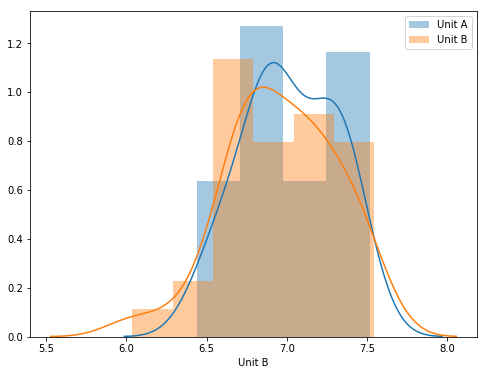

In [39]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(data['Unit A'], kde = True)
sns.distplot(data['Unit B'],hist = True)
plt.legend(labels)

# Transformations

Text(0.5, 1.0, 'Cube Root')

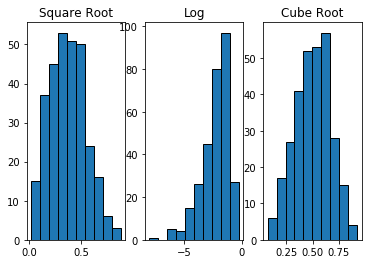

In [54]:
data_log = np.log(data)
data_log1 = np.sqrt(data)
data_log2 = np.cbrt(data)
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].hist(data_log1, edgecolor='black')
axs[0].set_title('Square Root')
axs[1].hist(data_log, edgecolor='black')
axs[1].set_title('Log')
axs[2].hist(data_log2, edgecolor='black')
axs[2].set_title('Cube Root')

# For checking Normal Distributions is followed or not by using Q-Q Plot

C:\Users\Payod\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


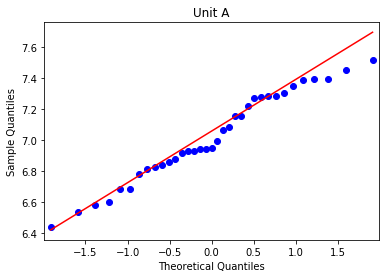

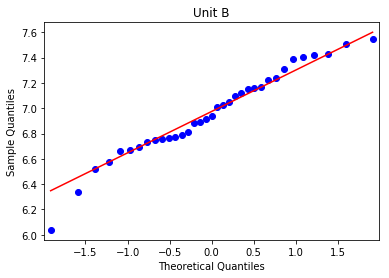

In [26]:
sm.qqplot(data["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(data["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

# HYPOTHESIS TESTING FROM ABOVE INCIDENCES USING T-STATISTICS 

In [35]:
statistic , p_value = stats.ttest_ind(data['Unit A'],data['Unit B'])
print('p_value=',p_value)

p_value= 0.4722394724599501


In [36]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print(' Null Hypothesis succesfully rejected, there is a significance difference between two Units A and B')
else:
    print('Failed to reject Null hypothesis due to no evidenece')

Significnace=0.025, p=0.472
Failed to reject Null hypothesis due to no evidenece


# No significant difference between the two samples